In [1]:
import pandas 
import numpy as np
import scipy as sp
import sympy as sm
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime 


In [2]:
def MCOptionPricer(sims, S_0, K, init_date, expiration_Date, N, r, vol, flag):
    T = ((datetime.strptime(expiration_Date, "%Y-%m-%d")-datetime.strptime(init_date,"%Y-%m-%d")).days)/365
    dt = T/N
    nu = r- 0.5*(vol**2)
    lnS0 = np.log(S_0)
    lnSt = lnS0 + np.cumsum(nu*dt + vol*np.sqrt(dt)*np.random.normal(size=(N,sims)),axis = 0)
    lnSt = np.concatenate( (np.full(shape=(1,sims),fill_value=lnS0),lnSt))
    St = np.exp(lnSt)
    
    if flag == "call":
        VT = np.maximum(0, St - K)
    elif flag == "put":
         VT = np.maximum(0, K-St)
    else:
        return "Incorrect flag input, should be 'call' or 'put'." 
        
    V0 = np.exp(-1*r*T)*(np.sum(VT[-1])/sims)
    SE = np.sqrt(np.sum((VT[-1]-V0)**2)/(sims-1))/sims
    print("The "+flag+" option price is {0} and the std error is {1}".format(np.round(V0,2),np.round(SE,4)))
   

In [3]:
Share = "AMZN"
ticker = yf.Ticker(Share)
df = yf.download(Share)
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...                ...         ...         ...         ...         ...   
2023-09-13  140.949997  144.979996  140.869995  144.850006  144.850006   
2023-09-14  145.080002  145.860001  142.949997  144.720001  144.720001   
2023-09-15  142.690002  143.570007  140.089996  140.389999  140.389999   
2023-09-18  140.479996  141.750000  139.220001  139.979996  139.979996   
2023-09-19  138.699997  138.839996  135.559

In [4]:
print(df["Adj Close"])

Date
1997-05-15      0.097917
1997-05-16      0.086458
1997-05-19      0.085417
1997-05-20      0.081771
1997-05-21      0.071354
                 ...    
2023-09-13    144.850006
2023-09-14    144.720001
2023-09-15    140.389999
2023-09-18    139.979996
2023-09-19    137.630005
Name: Adj Close, Length: 6630, dtype: float64


In [5]:

ticker.options
expiration_date =  ticker.options[10]
expiration_date

'2024-03-15'

In [6]:
options = ticker.option_chain(expiration_date)

In [7]:
options.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN240315C00050000,2023-09-19 19:51:10+00:00,50.0,89.25,88.45,89.80,-3.180000,-3.440442,10,201,0.954834,True,REGULAR,USD
1,AMZN240315C00055000,2023-08-22 16:48:39+00:00,55.0,81.87,83.65,84.90,0.000000,0.000000,1,129,0.893312,True,REGULAR,USD
2,AMZN240315C00060000,2023-08-02 15:26:09+00:00,60.0,70.80,79.35,80.85,0.000000,0.000000,2,314,0.906373,True,REGULAR,USD
3,AMZN240315C00065000,2023-08-30 14:32:39+00:00,65.0,71.68,74.10,75.25,0.000000,0.000000,7,338,0.790774,True,REGULAR,USD
4,AMZN240315C00070000,2023-08-23 14:53:36+00:00,70.0,67.63,69.35,70.40,0.000000,0.000000,2,1338,0.742190,True,REGULAR,USD
5,AMZN240315C00075000,2023-08-09 15:22:18+00:00,75.0,65.40,65.35,66.85,0.000000,0.000000,2,5768,0.770754,True,REGULAR,USD
6,AMZN240315C00080000,2023-09-15 13:41:56+00:00,80.0,64.60,59.85,60.90,0.000000,0.000000,1,1104,0.656376,True,REGULAR,USD
7,AMZN240315C00085000,2023-09-05 16:38:27+00:00,85.0,55.10,55.15,56.20,0.000000,0.000000,1,861,0.617313,True,REGULAR,USD
8,AMZN240315C00090000,2023-09-19 16:51:27+00:00,90.0,49.80,50.45,51.60,-5.500000,-9.945750,2,1040,0.580937,True,REGULAR,USD
9,AMZN240315C00095000,2023-09-11 18:50:19+00:00,95.0,51.31,46.00,47.00,0.000000,0.000000,1,1116,0.550175,True,REGULAR,USD


In [8]:
options.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN240315P00050000,2023-09-19 14:14:31+00:00,50.0,0.05,0.04,0.07,-0.010000,-16.666664,2,614,0.568364,False,REGULAR,USD
1,AMZN240315P00055000,2023-09-14 17:48:12+00:00,55.0,0.06,0.06,0.09,0.000000,0.000000,8,1229,0.536137,False,REGULAR,USD
2,AMZN240315P00060000,2023-09-19 18:47:54+00:00,60.0,0.12,0.10,0.12,0.040000,50.000000,1,500,0.511724,False,REGULAR,USD
3,AMZN240315P00065000,2023-09-14 19:11:01+00:00,65.0,0.12,0.14,0.17,0.000000,0.000000,16,1063,0.494146,False,REGULAR,USD
4,AMZN240315P00070000,2023-09-19 14:14:31+00:00,70.0,0.22,0.20,0.22,0.020000,9.999998,5,2456,0.466802,False,REGULAR,USD
5,AMZN240315P00075000,2023-09-19 18:49:01+00:00,75.0,0.29,0.27,0.30,0.070000,31.818178,5,6974,0.444830,False,REGULAR,USD
6,AMZN240315P00080000,2023-09-15 19:22:40+00:00,80.0,0.37,0.38,0.41,0.000000,0.000000,1,3287,0.424810,False,REGULAR,USD
7,AMZN240315P00085000,2023-09-19 13:30:01+00:00,85.0,0.55,0.54,0.57,0.040000,7.843141,2,4503,0.407965,False,REGULAR,USD
8,AMZN240315P00090000,2023-09-19 15:29:20+00:00,90.0,0.84,0.75,0.78,0.160000,23.529406,2,4951,0.391119,False,REGULAR,USD
9,AMZN240315P00095000,2023-09-19 18:14:08+00:00,95.0,1.08,1.04,1.07,0.080000,8.000004,7,5179,0.376349,False,REGULAR,USD


In [9]:
#Getting Risk-free rate
AnnualRate = yf.download("^TNX")["Adj Close"]
DailyRate = (1+AnnualRate)**(1/365)-1


[*********************100%***********************]  1 of 1 completed


In [10]:
#Calculating prices for the calls 

rfrate = DailyRate[-1]
Spot = df["Adj Close"][-1]
Strike_call = options.calls["strike"][0]
Volatility_call  = options.calls["impliedVolatility"][0]



MCOptionPricer(100000,Spot, Strike_call,datetime.today().strftime('%Y-%m-%d'),expiration_date, 365, rfrate, Volatility_call, "call" )

The call option price is 88.84 and the std error is 0.001


In [11]:
#Calculating prices for the puts
Strike_put = options.puts["strike"][0]
Volatility_put = options.puts["impliedVolatility"][0]



MCOptionPricer(100000,Spot, Strike_put,datetime.today().strftime('%Y-%m-%d'),expiration_date, 365, rfrate, Volatility_put, "put" )

The put option price is 0.06 and the std error is 0.0


Text(0.5, 1.0, 'Call Volatility')

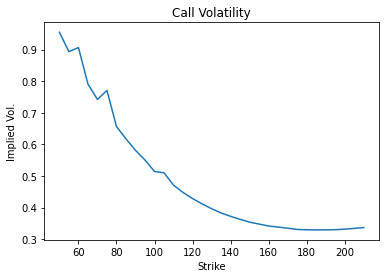

In [12]:
#Plotting Volatility Curves
plt.plot(options.calls["strike"], options.calls["impliedVolatility"])
plt.xlabel("Strike")
plt.ylabel("Implied Vol.")
plt.title("Call Volatility")

Text(0.5, 1.0, 'Put Volatility')

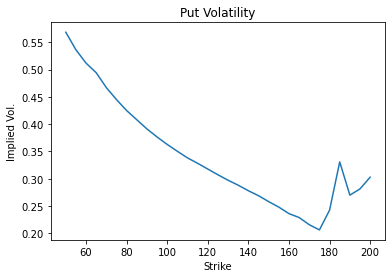

In [13]:
plt.plot(options.puts["strike"], options.puts["impliedVolatility"])
plt.xlabel("Strike")
plt.ylabel("Implied Vol.")
plt.title("Put Volatility")